## Estadística Inferencial

Se llama estadística inferencial a la rama de la Estadística encargada de hacer deducciones, es decir, inferir propiedades, conclusiones y tendencias, a partir de una muestra del conjunto. Su papel es interpretar, hacer proyecciones y comparaciones.

- Correlaciones Lineales
- Outliers
    - Puntuación Z (Z-Score)
    - Valle de Tukey
- Contraste de Hipotesis

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

from collections import Counter
import random
import pickle

import scipy
from scipy import stats

In [2]:
# Versiones

print(f"numpy=={np.__version__}")
print(f"matplotlib=={matplotlib.__version__}")
print(f"seaborn=={sns.__version__}")
print(f"scipy=={scipy.__version__}")

numpy==2.2.0
matplotlib==3.10.0
seaborn==0.13.2
scipy==1.14.1


In [3]:
# Data
# Estos datos representan: ENGINESIZE, FUELCONSUMPTION_CITY, CYLINDERS, CO2EMISSIONS del csv FuelConsumptionCo2

with open(file = "../Data/ENGINESIZE.pkl", mode = "br") as file:
    engine_size = pickle.load(file)
    
with open(file = "../Data/FUELCONSUMPTION_CITY.pkl", mode = "br") as file:
    fuelconsumption_city = pickle.load(file)
    
with open(file = "../Data/CYLINDERS.pkl", mode = "br") as file:
    cylinders = pickle.load(file)
    
with open(file = "../Data/CO2EMISSIONS.pkl", mode = "br") as file:
    co2_emissions = pickle.load(file)

### Correlación entre 2 variables

La correlación entre dos variables es una medida que indica la fuerza y la dirección de la relación lineal entre ellas. También se puede entender como qué tan probable es que una variable cambie cuando la otra variable cambia.

El método que se va a utilizar para calcular la correlación entre 2 variables es el **coeficiente de correlación lineal de Pearson**. El cual mide únicamente la relación entre ambas variables sin considerar dependencias y siempre buscando una correlación lineal. Se suele denotar con la letra griega _**rho**_ $\rho$.

Para poder calcular la correlación utilizamos el cálculo de la covarianza entre ambas variables.

$$
\Large Cov(X, Y) = \frac{\sum_{i=1}^{n}(x_{i} - \bar{x})(y_{i} - \bar{y})}{n}\\
\Large \rho = \frac{Cov(X, Y)}{\sigma_{x}\sigma_{y}}
$$

Donde el valor de $\rho$ puede tomar valores desde -1 hasta +1 y de acuerdo a su valor se pueden asignar las siguientes categorías:

- 0: asociación nula.
- 土 0.1: asociación pequeña.
- 土 0.3: asociación mediana.
- 土 0.5: asociación moderada.
- 土 0.7: asociación alta.
- 土 0.9: asociación muy alta.

Este estadístico, como muchos otros, suele venir con un valor $\rho$ que representa su nivel de significancia. Esto lo veremos más en detalle en el contraste de hipótesis.

Para calcular el **coeficiente de correlación lineal de Pearson** usaremos la función **stats.pearsonr()**.

In [4]:
# Coeficiente de correlación lineal de Pearson
# Variables engine_size y fuelconsumption_city

stats.pearsonr(engine_size, fuelconsumption_city)

# El primer valor es la correlación, el segundo su nivel de significacia

PearsonRResult(statistic=np.float64(0.8322249911432418), pvalue=np.float64(4.690573360456847e-275))

In [5]:
# Para obtener el primer valor

stats.pearsonr(engine_size, fuelconsumption_city)[0]

np.float64(0.8322249911432418)

In [6]:
# Probamos con las otras variables (engine_size)

print(f"Correlación engine_size/engine_size: {stats.pearsonr(engine_size, engine_size)[0]}")
print(f"Correlación engine_size/fuelconsumption_city: {stats.pearsonr(engine_size, fuelconsumption_city)[0]}")
print(f"Correlación engine_size/cylinders: {stats.pearsonr(engine_size, cylinders)[0]}")
print(f"Correlación engine_size/co2_emissions: {stats.pearsonr(engine_size, co2_emissions)[0]}")

Correlación engine_size/engine_size: 1.0
Correlación engine_size/fuelconsumption_city: 0.8322249911432418
Correlación engine_size/cylinders: 0.9340105318978434
Correlación engine_size/co2_emissions: 0.8741543683958123


In [7]:
# Probamos con las otras variables (fuelconsumption_city)

print(f"Correlación fuelconsumption_city/engine_size: {stats.pearsonr(fuelconsumption_city, engine_size)[0]}")
print(f"Correlación fuelconsumption_city/fuelconsumption_city: {stats.pearsonr(fuelconsumption_city, fuelconsumption_city)[0]}")
print(f"Correlación fuelconsumption_city/cylinders: {stats.pearsonr(fuelconsumption_city, cylinders)[0]}")
print(f"Correlación fuelconsumption_city/co2_emissions: {stats.pearsonr(fuelconsumption_city, co2_emissions)[0]}")

Correlación fuelconsumption_city/engine_size: 0.8322249911432418
Correlación fuelconsumption_city/fuelconsumption_city: 1.0
Correlación fuelconsumption_city/cylinders: 0.7964726538688851
Correlación fuelconsumption_city/co2_emissions: 0.8980385119353927


In [8]:
# Probamos con las otras variables (cylinders)

print(f"Correlación cylinders/engine_size: {stats.pearsonr(cylinders, engine_size)[0]}")
print(f"Correlación cylinders/fuelconsumption_city: {stats.pearsonr(cylinders, fuelconsumption_city)[0]}")
print(f"Correlación cylinders/cylinders: {stats.pearsonr(cylinders, cylinders)[0]}")
print(f"Correlación cylinders/co2_emissions: {stats.pearsonr(cylinders, co2_emissions)[0]}")

Correlación cylinders/engine_size: 0.9340105318978434
Correlación cylinders/fuelconsumption_city: 0.7964726538688851
Correlación cylinders/cylinders: 1.0
Correlación cylinders/co2_emissions: 0.8496845920141145


In [9]:
# Probamos con las otras variables (co2_emissions)

print(f"Correlación co2_emissions/engine_size: {stats.pearsonr(co2_emissions, engine_size)[0]}")
print(f"Correlación co2_emissions/fuelconsumption_city: {stats.pearsonr(co2_emissions, fuelconsumption_city)[0]}")
print(f"Correlación co2_emissions/cylinders: {stats.pearsonr(co2_emissions, cylinders)[0]}")
print(f"Correlación co2_emissions/co2_emissions: {stats.pearsonr(co2_emissions, co2_emissions)[0]}")

Correlación co2_emissions/engine_size: 0.8741543683958123
Correlación co2_emissions/fuelconsumption_city: 0.8980385119353927
Correlación co2_emissions/cylinders: 0.8496845920141145
Correlación co2_emissions/co2_emissions: 1.0


In [ ]:
# Podriamos crear una matriz de correlaciones

variables = [engine_size, fuelconsumption_city, cylinders, co2_emissions]

matriz_corr = list()

for variable1 in variables:
    
    fila = list()
    
    for variable2 in variables:
        
        fila.append(stats.pearsonr(variable1, variable2)[0])
        
    matriz_corr.append(fila)
    
np.array(matriz_corr)

# Variables: engine_size, fuelconsumption_city, cylinders, co2_emissions

array([[1.        , 0.83222499, 0.93401053, 0.87415437],
       [0.83222499, 1.        , 0.79647265, 0.89803851],
       [0.93401053, 0.79647265, 1.        , 0.84968459],
       [0.87415437, 0.89803851, 0.84968459, 1.        ]])

### Outliers
Un outlier es un individuo de una población con **características/valores extremadamente atípicos**. Existen varios métodos para detectar outliers, pero los más comunes aprovechan las medidas de dispersión para conseguirlo.

Un mismo individuo puede ser considerado como outlier por un método, y como normal por otro, por lo que debemos tener en cuenta cómo funcionan antes de aplicarlos.

A continuación veremos cómo podemos usar las medidas de **rango intercuartil** (_ric_ o _iqr_) y **desviación estándar** (_std_) para detectar outliers.

#### 1. Puntuación Z (_Z-Score_)
La **puntuación z** es una medida que nos dice a qué distancia se encuentra un valor de la media en términos de desviación estándar. Si un valor tiene una **puntuación z** de -1, quiere decir se encuentra a una desviación estándar a la izquierda de la media. En otras palabras, ese valor es igual a la media menos la desviación estándar.

Resulta que para distribuciones normales, los valores comprendidos entre **puntuaciones z** de -3 y 3 constituyen el 99,7% de todos los datos. Podemos aprovechar esto para declarar cualquier valor con una **puntuación z** fuera de ese rango como atípico.

Esta forma de detectar outliers es la más sencilla de todas, pero pierde eficacia cuando se trata de distribuciones asimétricas.

In [11]:
# Generamos una lista de números aleatorios con la librería random
array = np.array([random.gauss(100, 15) for _ in range(10_000)])

def outliers_z_score(array, z = 3):
    
    # Calculamos media y std
    mean = np.mean(array)
    std = np.std(array)
    
    # Calculamos los limites laterales (𝜇 ± z*𝜎)
    lim_l = mean - z*std
    lim_r = mean + z*std
    
    # Filtramos los elementos del array, los que esten fuera de los limites laterales.
    outliers = [elem for elem in array if elem < lim_l or elem > lim_r]
    
    # Filtramos los elementos del array, los que no pertenezcan a outliers.
    normal_data = [elem for elem in array if elem not in outliers]
    
    # Retornamos ambos arrays, uno con los datos sin outliers, otro con los outliers
    return np.array(normal_data), np.array(outliers)

In [12]:
normal_data, outliers = outliers_z_score(array)

print(f"Total de no-outliers: {len(normal_data)}")
print(f"Total de outliers: {len(outliers)}")

print(outliers)

Total de no-outliers: 9977
Total de outliers: 23
[148.05432537  49.44164459 146.01257715  47.67556206  53.29433588
  53.51597738  50.02880139  49.71360817 148.50022986 145.33468572
 149.21624596 153.19359644 149.17510191  54.29980567  38.20707194
  52.52112554  44.27446136  53.86951217 145.3612884   53.69229888
  53.29975794  54.07450556  52.18819621]


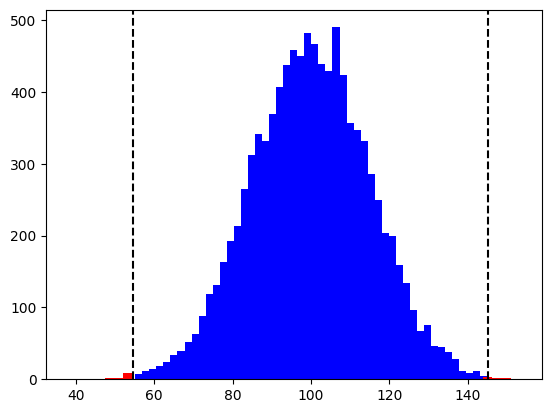

In [13]:
mean = np.mean(array)
std = np.std(array)

# Limites laterales
lim_l = mean - 3*std
lim_r = mean + 3*std

# No-Outliers
plt.hist(normal_data, bins = 50, color = "blue")

# Outliers
plt.hist(outliers, bins = 50, color = "red")

# 𝜇 ± 3𝜎
plt.axvline(lim_l, color = "black", linestyle = "--")
plt.axvline(lim_r, color = "black", linestyle = "--")

plt.show()

#### 2. La valla de Tukey (_Tukey's Fence Rule_)
Este método es algo más robusto ante distribuciones asimétricas que el anterior.

Igual que con las **puntuaciones z**, necesitamos establecer unos límites a la izquierda y a la derecha de la distribución. Esta vez, vamos a aprovechar los cuantiles. Tomando como referencia los cuartiles **Q1** y **Q3**, nos alejamos $1.5*ric$ de cada uno de ellos a la izquierda y a la derecha, respectivamente. Esos serán nuestros puntos de corte. Cualquier valor que se encuentre fuera de ese rango, lo consideramos como atípico.

Podemos modificar el multiplicador del rango intercuartil ($k=1.5$) a nuestro antojo, según necesitemos ser más o menos estrictos. Al incrementar el multiplicador, incrementamos el rango de normalidad, por lo que tendremos menos outliers.

In [14]:
def outliers_tukey(array, k = 1.5):
    
    # Calculamos los cuartiles Q1 y Q3
    q1 = np.quantile(array, 0.25)
    q3 = np.quantile(array, 0.75)
    
    # Rango InterCuartil
    ric = q3 - q1
    
    # Calculamos los límites laterales
    lim_l = q1 - k*ric
    lim_r = q3 + k*ric
    
    # Filtramos los elementos del array, los que esten fuera de los limites laterales.
    outliers = [elem for elem in array if elem < lim_l or elem > lim_r]
    
    
    # Filtramos los elementos del array, los que no pertenezcan a outliers.
    normal_data = [elem for elem in array if elem not in outliers]
    
    # Retornamos ambos arrays, uno con los datos sin outliers, otro con los outliers
    return np.array(normal_data), np.array(outliers)

In [15]:
normal_data, outliers = outliers_tukey(array)

print(f"Total de no-outliers: {len(normal_data)}")
print(f"Total de outliers: {len(outliers)}")

print(outliers)

Total de no-outliers: 9941
Total de outliers: 59
[142.106455    57.52031801 148.05432537 144.2685854   49.44164459
 146.01257715 140.95654188  47.67556206  53.29433588  53.51597738
 142.09680196  50.02880139  56.26301404 142.61656665  57.31713343
 145.02529325  49.71360817 141.23043273  58.7090105  148.50022986
 142.09336446 145.33468572  56.55105482 149.21624596 142.15743459
 153.19359644 149.17510191  54.29980567 142.43772162  38.20707194
  55.62640362  57.14099708  52.52112554  57.20329614  55.17352831
 143.48434324  44.27446136  53.86951217 142.20021154  57.60545709
  55.95366242  57.88818093  58.66989091 142.13115014  58.49284589
 145.3612884   53.69229888  56.76274902 141.49981164  58.51691457
  53.29975794 144.35385954  58.56431158  55.60780051  54.07450556
 143.18014345  52.18819621 142.80065612 143.60989741]


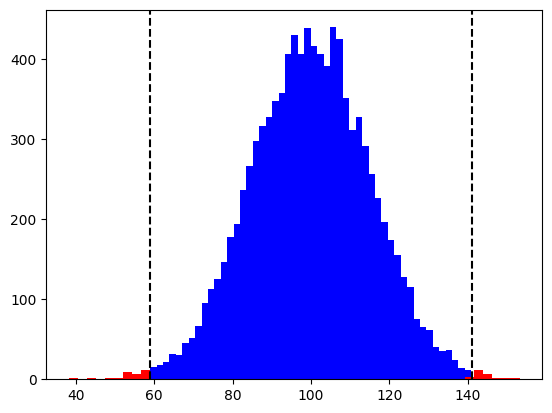

In [16]:
q1 = np.quantile(array, 0.25)
q3 = np.quantile(array, 0.75)
ric = q3 - q1

lim_l = q1 - 1.5*ric
lim_r = q3 + 1.5*ric

# No-Outliers
plt.hist(normal_data, bins = 50, color = "blue")

# Outliers
plt.hist(outliers, bins = 50, color = "red")

# Q1 - 1.5*ric
plt.axvline(lim_l, color = "black", linestyle = "--")

# Q3 + 1.5*ric
plt.axvline(lim_r, color = "black", linestyle = "--")

plt.show()

Existen muchos otros métodos que aprovechan estadísticos como el **MAD (Median Absolute Deviation)**, o algoritmos de clustering como **DBSCAN** para detectar outliers.

### Contraste de hipótesis

El contraste de hipótesis es una técnica de la estadística inferencial que nos permite tomar decisiones sobre afirmaciones o suposiciones acerca de una población, basadas en la información obtenida de una muestra de esa población.

1. Para llevar a cabo un contraste de hipótesis necesitamos primero formular dos hipótesis. La primera se conoce como hipótesis nula ($H_0$), y es una suposición o afirmación de que la condición que queremos probar o refutar no es cierta. Por ejemplo, si queremos comprobar si el cociente intelectual promedio de los alumnos de cuarto de la ESO es diferente al cociente intelectual promedio de la población general, la hipótesis nula sería que son iguales, que no existe diferencia.

    Por el contrario, tenemos también la hipótesis alternativa ($H_1$), que no es más que lo opuesto a la nula. En ese caso, la $H_1$ sería que el alumno promedio de cuarto de la ESO tiene un CI diferente (mayor o menor) que el el ciudadano promedio de España.

    El contraste de hipótesis nos permite tomar una decision al respecto de estas dos hipótesis. Nos da cierta certeza para tomar una u otra como la verdadera.

- Ejemplo
    - $H_0$: las emisiones de CO2 de _**FORD**_ son en promedio **iguales** que las emisiones de CO2 de _**MERCEDES-BENZ**_.
    - $H_1$: las emisiones de CO2 de _**FORD**_ son en promedio **diferentes** que las emisiones de CO2 de _**MERCEDES-BENZ**_.

In [17]:
# Vamos a extraer muestras del csv FuelConsumptionCo2
# Cada array representa una marca de coche y vamos a extraer las emisiones de CO2
# Trabajaremos con 3 muestras, el primer ejemplo serán con las muestras 1 y 2
# Se pueden hacer otros ejemplos con las muestras 1 y 3 o 2 y 3.

# MAKE == "FORD"
with open(file = "../Data/muestra_1.pkl", mode = "br") as file:
    muestra_1 = pickle.load(file)

# MAKE == "MERCEDES-BENZ"
with open(file = "../Data/muestra_2.pkl", mode = "br") as file:
    muestra_2 = pickle.load(file)

# MAKE == "CHEVROLET"
with open(file = "../Data/muestra_3.pkl", mode = "br") as file:
    muestra_3 = pickle.load(file)

print(f"Datos FORD: {len(muestra_1)}")
print(f"Datos MERCEDES-BENZ: {len(muestra_2)}")
print(f"Datos CHEVROLET: {len(muestra_3)}")

Datos FORD: 90
Datos MERCEDES-BENZ: 59
Datos CHEVROLET: 86


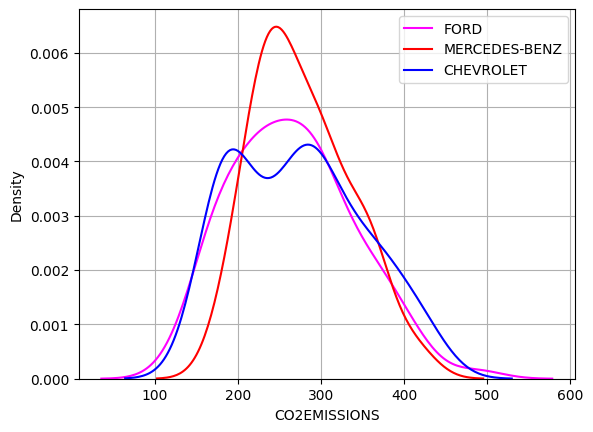

In [18]:
# Veamos las distribuciones de los datos en una gráfica

sns.kdeplot(muestra_1, color = "magenta", label = "FORD")
sns.kdeplot(muestra_2, color = "red", label = "MERCEDES-BENZ")
sns.kdeplot(muestra_3, color = "blue", label = "CHEVROLET")

plt.grid()
plt.legend()
plt.show()

2. Esto lo conseguimos estableciendo un nivel de significancia. Es, en esencia, el nivel de confianza de los resultados del contraste. Se representa con la letra griega **alpha** $α$ y nos indica el valor máximo que aceptamos que tenga el valor $p$.
    
    Ahora, el valor $p$ representa una probabilidad. Concretamente es la probabilidad que tenemos de obtener una muestra como la que usamos en el contraste, dado que la hipótesis nula sea verdadera. En otras palabras, es un valor de confianza. Cuanto más grande el valor, más seguros podemos estar de la certeza de la hipótesis nula; y cuanto más pequeño sea, más seguros podemos estar de la hipótesis alternativa.
    
    Teniendo esto en cuenta, debemos establecer una $α$ acorde a la naturaleza del problema. En algunos contrastes, debemos ser extremadamente estrictos para afirmar la hipótesis alternativa como verdadera, por lo que debemos establecer una $α$ muy, muy baja como $0.01$ o incluso $0.001$. En la mayoría de los casos, este umbral se suele establecer en $0.05$, representando que estamos dispuestos a tomar un riesgo de, como mucho, un 5% de aceptar como verdadera la hipótesis alternativa cuando en realidad la verdadera es la nula.
    
    Este error se conoce como error de tipo I. Existe también el error de tipo II, que se comete al aceptar la hipótesis nula como verdadera, cuando realmente la verdadera es la alternativa.

| | Contraste $H_0$ | Contraste $H_1$ |
|-|--|--|
| __Real $H_0$__ | OK | Tipo I |
| __Real $H_1$__ | Tipo II | OK |

- Ejemplo
    - $α = 0.05$

In [19]:
alpha = 0.05 # nivel de significancia

3. En función de la hipótesis que queramos contrastar y de la distribución de los datos, debemos seleccionar una prueba u otra. Algunas pruebas nos permiten comparar estadísticos como promedios y medianas, otras son útiles para comparar frecuencias de valores. Las pruebas además se categorizan en paramétricas y no paramétricas.
<br>

    - Las pruebas paramétricas asumen que la distribución de los datos sigue un modelo específico. La mayoría asumen que la distribución es normal y que existe homogeneidad de varianzas. Antes de aplicar una prueba paramétrica, debemos comprobar que estos requisitos se cumplen para nuestros datos mediante pruebas específicas. Dados los pre-requisitos, no siempre vamos a poder aplicar una prueba paramétrica. No obstante, cuando podamos deben ser nuestra primera opción, ya que son mas potentes.
    
    <br>
      
    - Cuando no es posible aplicar una prueba paramétrica porque nuestros datos no cumplen alguno de los requisitos, debemos recurrir a pruebas no paramétricas. Lo bueno de estas pruebas es que no necesitamos asumir nada acerca de nuestros datos y podemos aplicarlas siempre que queramos, pero son una opción menos eficaz que su contraparte paramétrica.

| Comparación      | Prueba paramétrica       | Asunciones                                      | Contraparte no paramétrica       |
|------------------| ------------------------ | ----------------------------------------------- | -------------------------------- |
| Posición central | _**t de Student**_       | Normalidad de datos y homogeneidad de varianzas | _**Mann-Whitney U**_             |
| Dispersión       | _**Prueba F (ANOVA)**_   | Normalidad de datos y homogeneidad de varianzas | _**Kruskal-Wallis**_             |
| Frecuencia       | _**Chi-cuadrado**_       | Mínimo de 5 casos para cada categoría           | _**Prueba de Fisher exacto**_    |

- Para comparar la similitud de los dos conjuntos de datos, podemos comparar sus medias mediante la prueba **t de Student** para dos muestras independientes. En caso de no cumplirse las asunciones para esta prueba paramétrica, podemos utilizar la prueba **U de Mann-Whitney** y comparar con ella las medianas, en lugar de las medias.

#### Comprobamos si las muestras son normales

Para comprobar si una muestra es normal usaremos la función _**stats.normaltest()**_.
- Se basa en la prueba de _D'Agostino_ y _Pearson_ que combina **asimetría** (_skewness_) y **curtosis** (_kurtosis_) para producir una prueba global de normalidad.


Esta función retorna dos valores: _**statistic**_ y _**pvalue**_.

- El valor de _**statistic**_ representa la diferencia entre la distribución y una distribución normal.
    - Mientras más grande sea el valor de _**statistic**_ más diferente será esa distribución de una distribución normal.
---

- El valor de _**pvalue**_ es la probabilidad de obtener un resultado tan extremo o más extremo que el observado si los datos son realmente normales.
    - Para entender el valor de _**pvalue**_ debemos compararlo con _**alpha**_ (el nivel de significancia):
    - Si _**pvalue**_ < _**alpha**_, decimos que es poco probable que los datos sigan una distribución normal.
    - Si _**pvalue**_ > _**alpha**_, decimos que es probable que los datos sigan una distribución normal.
    
    
De forma resumida:
- _**statistic**_ nos dice qué tan diferente es la distribución de la muestra de una normal.
- _**pvalue**_ nos dice qué tan probable es que esa diferencia se deba al azar.

In [20]:
from scipy import stats

student = True # Asumimos que usaremos la t de Student

# Aplicaremos stats.normaltest() a ambas muestras y compararemos con alpha, con esto vamos a verificar si son distribuciones normales o no.

_, p_muestra_1 = stats.normaltest(muestra_1)
_, p_muestra_2 = stats.normaltest(muestra_2)

if p_muestra_1 < alpha:
    print(f"muestra_1 no se ajusta a una distribución normal (p = {p_muestra_1})")
    student = False
else:
    print(f"muestra_1 tiene una distribución normal (p = {p_muestra_1})")
    
if p_muestra_2 < alpha:
    print(f"muestra_2 no se ajusta a una distribución normal (p = {p_muestra_2})")
    student = False
else:
    print(f"muestra_2 tiene una distribución normal (p = {p_muestra_2})")

muestra_1 tiene una distribución normal (p = 0.237665247016491)
muestra_2 tiene una distribución normal (p = 0.22098218924752044)


In [21]:
from scipy import stats

student = True # Asumimos que usaremos la t de Student

# Aplicaremos stats.normaltest() a ambas muestras y compararemos con alpha, con esto vamos a verificar si son distribuciones normales o no.

_, p_muestra_1 = stats.normaltest(muestra_1)
_, p_muestra_2 = stats.normaltest(muestra_2)

if p_muestra_1 < alpha:
    print(f"muestra_1 no se ajusta a una distribución normal (p = {p_muestra_1})")
    student = False
else:
    print(f"muestra_1 tiene una distribución normal (p = {p_muestra_1})")
    
if p_muestra_2 < alpha:
    print(f"muestra_2 no se ajusta a una distribución normal (p = {p_muestra_2})")
    student = False
else:
    print(f"muestra_2 tiene una distribución normal (p = {p_muestra_2})")

muestra_1 tiene una distribución normal (p = 0.237665247016491)
muestra_2 tiene una distribución normal (p = 0.22098218924752044)


#### Comprobamos la homogeneidad de varianzas

Para comprobar la homogeneidad de varianzas entre 2 muestras usaremos la función _**stats.levene()**_.

Esta función retorna dos valores: _**statistic**_ y _**pvalue**_.

- El valor de _**statistic**_ representa la diferencia entre las varianzas de ambos grupos.
    - Mientras más grande sea el valor de _**statistic**_ más diferente serán esas varianzas.
---

- El valor de _**pvalue**_ es la probabilidad de obtener un resultado tan extremo o más extremo que el observado si las varianzas de los grupos son iguales.
    - Para entender el valor de _**pvalue**_ debemos compararlo con _**alpha**_ (el nivel de significancia):
    - Si _**pvalue**_ < _**alpha**_, decimos que es poco probable que las varianzas de los grupos sean iguales.
    - Si _**pvalue**_ > _**alpha**_, decimos que es probable que las varianzas de los grupos sean iguales.

De forma resumida:
- _**statistic**_ nos dice qué tan diferentes son las varianzas de ambas muestras.
- _**pvalue**_ nos dice qué tan probable es que esa diferencia se deba al azar.

In [22]:
_, p_levene = stats.levene(muestra_1, muestra_2)

if p_levene < alpha:
    print(f"Las varianzas no son homogeneas (p = {p_levene})")
    student = False
else:
    print(f"Las varianzas son homogeneas (p = {p_levene})")

Las varianzas son homogeneas (p = 0.05451379378367709)


#### Calculamos la _t de Student_ o la _U de Mann-Whitney_, dependiendo de si se cumplen las asunciones

- _**t de Student**_ (Prueba Paramétrica, se cumplen las 2 asunciones anteriores):
    - Función _**stats.ttest_ind()**_.
    - Esta función retorna dos valores: _**statistic**_ y _**pvalue**_.
    
        - El valor de _**statistic**_ (también llamado _**t**_ en este caso) representa la diferencia entre las medias de ambos grupos.
            - Mientras más grande sea el valor de _**statistic**_ más diferente serán esas medias.
            
            ---

        - El valor de _**pvalue**_ es la probabilidad de obtener un resultado tan extremo o más extremo que el observado si las medias de los grupos son iguales.
            - Para entender el valor de _**pvalue**_ debemos compararlo con _**alpha**_ (el nivel de significancia):
            - Si _**pvalue**_ < _**alpha**_, decimos que es poco probable que las medias de los grupos sean iguales.
            - Si _**pvalue**_ > _**alpha**_, decimos que es probable que las medias de los grupos sean iguales.

    De forma resumida:
    - _**statistic**_ nos dice qué tan diferentes son las medias de ambas muestras.
    - _**pvalue**_ nos dice qué tan probable es que esa diferencia se deba al azar.
---
- _**U de Mann-Whitney**_ (Prueba No Paramétrica, no se cumple al menos 1 de las asunciones anteriores):

    - Función _**stats.mannwhitneyu()**_.
    - Esta función retorna dos valores: _**statistic**_ y _**pvalue**_.
    
        - El valor de _**statistic**_ (también llamado _**U**_ en este caso) representa la diferencia entre las distribuciones de ambos grupos.
            - Mientras más grande sea el valor de _**statistic**_ más diferente serán ambas distribuciones.
            ---

        - El valor de _**pvalue**_ es la probabilidad de obtener un resultado tan extremo o más extremo que el observado si las distribuciones de los grupos son iguales..
            - Para entender el valor de _**pvalue**_ debemos compararlo con _**alpha**_ (el nivel de significancia):
            - Si _**pvalue**_ < _**alpha**_, decimos que es poco probable que las distribuciones de los grupos sean iguales.
            - Si _**pvalue**_ > _**alpha**_, decimos que es probable que las distribuciones de los grupos sean iguales.

    De forma resumida:
    - _**statistic**_ nos dice qué tan diferentes son las distribuciones de ambas muestras.
    - _**pvalue**_ nos dice qué tan probable es que esa diferencia se deba al azar.

In [23]:
# Aplicamos stats.ttest_ind() o stats.mannwhitneyu() dependiendo del caso

if student:
    
    t, p = stats.ttest_ind(muestra_1, muestra_2)
    
    print(f"El valor t de Student es: {t}")
    print(f"El valor p es: {p}")
    
else:
    
    u, p = stats.mannwhitneyu(muestra_1, muestra_2)
    
    print(f"El valor U de Mann-Whitney es: {u}")
    print(f"El valor p es: {p}")

El valor t de Student es: -1.031698354203112
El valor p es: 0.30390787613104725


4. Cuando realicemos una de estas pruebas, vamos a obtener un valor $p$. Si ese valor es menor a nuestra $α$, interpretamos la prueba rechazando la $H_0$. Por el contrario, si es mayor o igual a nuestra $α$, tomamos $H_0$ como cierta.

In [24]:
print(f"El valor de significancia p es {p:2e}")

print("La significancia es", "menor" if alpha > p else "mayor", f"a {alpha}")

print("Interpretación: la hipótesis nula (H0) es", "falsa." if alpha > p else "cierta.")

El valor de significancia p es 3.039079e-01
La significancia es mayor a 0.05
Interpretación: la hipótesis nula (H0) es cierta.


### Resumen de Funciones

|Función                   |Descripción                                                                      |
|--------------------------|---------------------------------------------------------------------------------|
|_**stats.normaltest()**_  |Prueba de **normalidad** sobre una muestra de datos.                             |
|_**stats.levene()**_      |Prueba de **homogeneidad de varianzas** entre dos muestras de datos.             |
|_**stats.ttest_ind()**_   |Prueba de **comparación de medias** de dos grupos independientes.                |
|_**stats.mannwhitneyu()**_|Prueba de **comparación** de dos grupos independientes **sin asumir normalidad**.|

**Es importante aclarar que estas pruebas no siempre son concluyentes. Hay que considerar otros factores que afectan los resultados, como el tamaño de las muestras, outliers y las formas de las distribuciones.**

**Es recomendable acompañar todo esto con visualizaciones.**

In [25]:
################################################################################################################################